# Code your own neuron and neural net
The parts of code that look like
```python
pass  # ⬅️✏️
```
need to be filled in before moving to the next cell.

Check out the slides and / or corresponding video lecture for more instructions.

In [1]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [2]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    c = [0] * len(a)
    for i in range(len(a)):
        c[i] = a[i] * b[i]
    return c

---

In [3]:
# Test mul() function
mul(my_x, my_w)

[0, 10, 5]

In [4]:
# Define a scalar: bias b
my_b = -5

In [5]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    return sum(mul(x, weights)) + bias

---

In [6]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10

In [7]:
# Import exp() function (safe on lists)
from numpy import exp

In [8]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    return 1 / (1 + exp(-z))

---

In [9]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


In [10]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

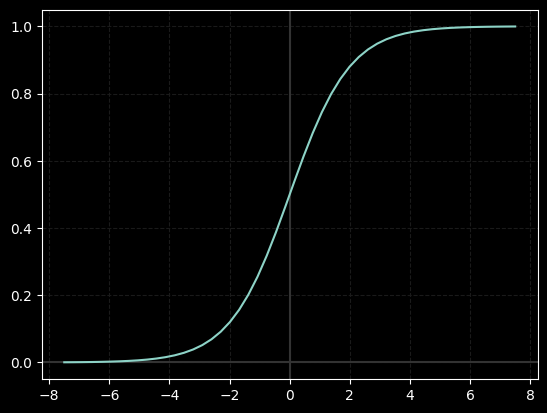

In [11]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.2'); axvline(color='.2')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z));

In [12]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    return sigmoid(linear_neuron(x, weights, bias))

---

In [13]:
# Test neuron() function
neuron(my_x, my_w, my_b)

0.9999546021312976

In [14]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    wt = 10
    input_len = len(x)
    return neuron(x, [wt]*input_len, -wt*(input_len**-1))

---

In [15]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [16]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.007
[0, 1] 0.993
[1, 0] 0.993
[1, 1] 1.000


In [17]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    wt = 10
    input_len = len(x)
    return neuron(x, [wt]*input_len, -wt-wt*(input_len**-1))

---

In [18]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.000
[0, 1] 0.007
[1, 0] 0.007
[1, 1] 0.993


In [19]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    wt = 10
    input_len = len(x)
    return neuron(x, [-wt]*input_len, wt*((input_len+1)**-1))

---

In [20]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
[0] 0.993
[1] 0.007


![X-OR](res/x-or_circuit.png)

In [21]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    first_input = [not_neuron([x[0]]), x[1]]
    first_term = and_neuron(first_input)
    second_input = [x[0], not_neuron([x[1]])]
    second_term = and_neuron(second_input)
    return or_neuron([first_term, second_term])

---

In [22]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.008
[0, 1] 0.993
[1, 0] 0.993
[1, 1] 0.008


Observation:

Higher weightage and respectively higher biases allow for more extreme values which is what we aim here

![Half-adder](res/half-adder_circuit.png)

In [23]:
# Combine a XOR and an AND into a half-adder

def half_adder(x):
    """
    Return [x1 XOR x2, x1 AND x2]
    """
    return [xor_neuron(x), and_neuron(x)]

In [24]:
# Test half_adder() function
print('Checking half-adder output')
for my_x in my_x_collection:
    print(my_x, half_adder(my_x))

Checking half-adder output
[0, 0] [0.007579088794449688, 3.059022269256247e-07]
[0, 1] [0.9928144745978649, 0.0066928509242848554]
[1, 0] [0.9928144745978649, 0.0066928509242848554]
[1, 1] [0.007714235078102648, 0.9933071490757153]


---

![Adder](res/adder_circuit.png)

In [25]:
# Combine two half-adders and an OR into a (full) adder
def adder(x, carry=0):
    """
    Return [x1 XOR x2 XOR carry, x1 XOR x2 AND carry OR x1 AND x2]
    """
    half_adder_1 = half_adder([x[0], x[1]])
    half_adder_2 = half_adder([half_adder_1[0], carry])
    
    return [half_adder_2[0], or_neuron([half_adder_1[1], half_adder_2[1]])]

In [26]:
# Test adder() function
print('Checking adder output')
for my_x in my_x_collection:
    print(my_x, adder(my_x))

Checking adder output
[0, 0] [0.007613560628376444, 0.0066928931987624155]
[0, 1] [0.9927766529575702, 0.007609233436300077]
[1, 0] [0.9927766529575702, 0.007609233436300077]
[1, 1] [0.007614200596755923, 0.9928472135532795]


In [27]:
# Define a collection to test adder
my_big_x_collection = [
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
]

In [28]:
# Test adder() function
print('Checking adder output')
for my_x in my_big_x_collection:
    first_adder = adder(my_x[:2])
    second_adder = adder([first_adder[0], my_x[2]])
    third_adder = adder([first_adder[1], second_adder[1]])
    print(my_x, [second_adder[0], third_adder[0]])

Checking adder output
[0, 0, 0] [0.007613724551222543, 0.007613846627981169]
[0, 0, 1] [0.9927766383701441, 0.007613867835983764]
[0, 1, 0] [0.9927764450418827, 0.0076138864732221674]
[0, 1, 1] [0.007614034253443297, 0.9927764303544843]
[1, 0, 0] [0.9927764450418827, 0.0076138864732221674]
[1, 0, 1] [0.007614034253443297, 0.9927764303544843]
[1, 1, 0] [0.0076137245655631255, 0.992776433381838]
[1, 1, 1] [0.9927766383688678, 0.9927764313338154]


---